In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv("Australian_Travel_Survey_Data.csv")

In [3]:
df1.head()

PERSONID  AGE  GENDER  ANYWORK  CARLICENCE  HHSTRUCTURE  HH_CARS  \
0  Y09H151315P01   40       2        1           1            4        0   
1  Y09H151324P01   73       1        2           1            2        1   
2  Y09H151340P01   85       2        2           1            1        1   
3  Y09H151329P01   34       2        1           1            3        1   
4  Y09H151325P01   68       1        2           1            3        2   

   HHINC_grp  SA1_code  PopDensity_SA1  SA2_code  PopDensity_SA2  SA3_code  \
0          1   2100106            1500     21001             158     20101   
1          1   2100108             703     21001             158     20101   
2          1   2100108             703     21001             158     20101   
3          3   2100108             703     21001             158     20101   
4          3   2100108             703     21001             158     20101   

   PopDensity_SA3     STATE  ACTIVE_TRAVEL_TIME  CAR_TIME  
0             213  Victoria                   0        35  
1             213  Victoria                   0       100  
2             213  Victoria                   0        35  
3             213  Victoria                   0        79  
4             213  Victoria                   0        97

In [4]:
df1.query("ACTIVE_TRAVEL_TIME > 0 & CAR_TIME > 0")

PERSONID  AGE  GENDER  ANYWORK  CARLICENCE  HHSTRUCTURE  HH_CARS  \
14     Y09H151332P01   63       1        1           1            2        1   
28     Y09H151305P04   19       2        1           1            3        2   
42     Y09H154224P02   57       2        1           1            2        2   
48     Y09H154228P02   62       2        2           1            2        2   
52     Y09H154228P01   64       1        1           1            2        2   
...              ...  ...     ...      ...         ...          ...      ...   
41504  Y09H260728P01   25       2        2           1            3        1   
41518  Y09H260742P01   50       2        1           1            1        1   
41520  Y09H260730P02   33       2        1           1            3        2   
41527  Y09H260722P02   59       1        1           1            5        1   
41535  Y09H260703P02   36       2        1           1            3        2   

       HHINC_grp  SA1_code  PopDensity_SA1  SA2_code  PopDensity_SA2  \
14             2   2100108             703     21001             158   
28             4   2100109            1874     21001             158   
42             4   2100204            1042     21002             975   
48             2   2100204            1042     21002             975   
52             2   2100204            1042     21002             975   
...          ...       ...             ...       ...             ...   
41504          2   3144416             736     31444              88   
41518          1   3144427             947     31444              88   
41520          5   3144427             947     31444              88   
41527          3   3144427             947     31444              88   
41535          5   3144427             947     31444              88   

       SA3_code  PopDensity_SA3       STATE  ACTIVE_TRAVEL_TIME  CAR_TIME  
14        20101             213    Victoria                  10        85  
28        20101             213    Victoria                  10        23  
42        20101             213    Victoria                  50        15  
48        20101             213    Victoria                  29        50  
52        20101             213    Victoria                  29        50  
...         ...             ...         ...                 ...       ...  
41504     31606              30  Queensland                  20        60  
41518     31606              30  Queensland                   6       108  
41520     31606              30  Queensland                  35        55  
41527     31606              30  Queensland                  30        13  
41535     31606              30  Queensland                  30        30  

[5537 rows x 17 columns]

In [5]:
# Accoding to google maps we have found that time took to travel 500 meters
# Cars = 2 mins
# Walking = 6 mins
# cycling = 2 mins

### To aggreagte the ACTIVE_TRAVEL_TIME = WALKING+CYCLING/2 = 6+2/2 = 4 mins

### Hence With Car 1 km in 4 mins and by Walking/Cycling = 8 mins.

In [6]:
df1['ACTIVE_TRAVEL_TIME'] = df1['ACTIVE_TRAVEL_TIME'].apply(lambda x: x/8)
df1['CAR_TIME'] = df1['CAR_TIME'].apply(lambda x: x/4)

In [7]:
df1.drop(['PERSONID'], axis = 1, inplace = True)

In [8]:
df1.query("ACTIVE_TRAVEL_TIME > 0 & CAR_TIME > 0")

AGE  GENDER  ANYWORK  CARLICENCE  HHSTRUCTURE  HH_CARS  HHINC_grp  \
14      63       1        1           1            2        1          2   
28      19       2        1           1            3        2          4   
42      57       2        1           1            2        2          4   
48      62       2        2           1            2        2          2   
52      64       1        1           1            2        2          2   
...    ...     ...      ...         ...          ...      ...        ...   
41504   25       2        2           1            3        1          2   
41518   50       2        1           1            1        1          1   
41520   33       2        1           1            3        2          5   
41527   59       1        1           1            5        1          3   
41535   36       2        1           1            3        2          5   

       SA1_code  PopDensity_SA1  SA2_code  PopDensity_SA2  SA3_code  \
14      2100108             703     21001             158     20101   
28      2100109            1874     21001             158     20101   
42      2100204            1042     21002             975     20101   
48      2100204            1042     21002             975     20101   
52      2100204            1042     21002             975     20101   
...         ...             ...       ...             ...       ...   
41504   3144416             736     31444              88     31606   
41518   3144427             947     31444              88     31606   
41520   3144427             947     31444              88     31606   
41527   3144427             947     31444              88     31606   
41535   3144427             947     31444              88     31606   

       PopDensity_SA3       STATE  ACTIVE_TRAVEL_TIME  CAR_TIME  
14                213    Victoria               1.250     21.25  
28                213    Victoria               1.250      5.75  
42                213    Victoria               6.250      3.75  
48                213    Victoria               3.625     12.50  
52                213    Victoria               3.625     12.50  
...               ...         ...                 ...       ...  
41504              30  Queensland               2.500     15.00  
41518              30  Queensland               0.750     27.00  
41520              30  Queensland               4.375     13.75  
41527              30  Queensland               3.750      3.25  
41535              30  Queensland               3.750      7.50  

[5537 rows x 16 columns]

### Creating date bins with the user defined range

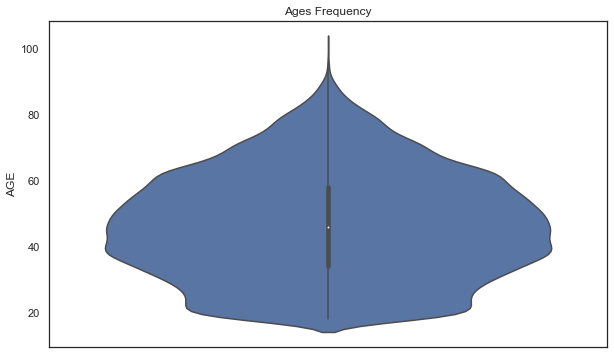

In [26]:
# Cheking age Frequency

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df1["AGE"])
plt.show()

In [9]:
bins=[18, 29, 39, 49, 59, 69, 79, 89, 101]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90 +']
df1['AGE_RANGE'] = pd.cut(df1['AGE'],bins,labels = labels, include_lowest = True)

## Separating active and sedentary population

In [10]:
df_active = pd.DataFrame(df1.query("ACTIVE_TRAVEL_TIME > CAR_TIME"))

In [11]:
df_active.head()

AGE  GENDER  ANYWORK  CARLICENCE  HHSTRUCTURE  HH_CARS  HHINC_grp  \
42   57       2        1           1            2        2          4   
49   60       1        2           1            2        2          2   
56   69       2        1           1            1        1          1   
63   64       2        2           1            2        2          5   
65   22       2        1           1            4        2          2   

    SA1_code  PopDensity_SA1  SA2_code  PopDensity_SA2  SA3_code  \
42   2100204            1042     21002             975     20101   
49   2100204            1042     21002             975     20101   
56   2100204            1042     21002             975     20101   
63   2100204            1042     21002             975     20101   
65   2100204            1042     21002             975     20101   

    PopDensity_SA3     STATE  ACTIVE_TRAVEL_TIME  CAR_TIME AGE_RANGE  
42             213  Victoria               6.250      3.75     50-59  
49             213  Victoria               2.500      0.00     60-69  
56             213  Victoria               6.250      0.00     60-69  
63             213  Victoria               2.500      0.00     60-69  
65             213  Victoria               5.125      0.00     18-29

In [12]:
print(df_active.shape)

(4571, 17)


In [13]:
df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4571 entries, 42 to 41527
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AGE                 4571 non-null   int64   
 1   GENDER              4571 non-null   int64   
 2   ANYWORK             4571 non-null   int64   
 3   CARLICENCE          4571 non-null   int64   
 4   HHSTRUCTURE         4571 non-null   int64   
 5   HH_CARS             4571 non-null   int64   
 6   HHINC_grp           4571 non-null   int64   
 7   SA1_code            4571 non-null   int64   
 8   PopDensity_SA1      4571 non-null   int64   
 9   SA2_code            4571 non-null   int64   
 10  PopDensity_SA2      4571 non-null   int64   
 11  SA3_code            4571 non-null   int64   
 12  PopDensity_SA3      4571 non-null   int64   
 13  STATE               4571 non-null   object  
 14  ACTIVE_TRAVEL_TIME  4571 non-null   float64 
 15  CAR_TIME            4571 non-null   

In [14]:
df_sed = pd.DataFrame(df1.query("ACTIVE_TRAVEL_TIME < CAR_TIME"))

In [15]:
df_sed.head()

AGE  GENDER  ANYWORK  CARLICENCE  HHSTRUCTURE  HH_CARS  HHINC_grp  \
0   40       2        1           1            4        0          1   
1   73       1        2           1            2        1          1   
2   85       2        2           1            1        1          1   
3   34       2        1           1            3        1          3   
4   68       1        2           1            3        2          3   

   SA1_code  PopDensity_SA1  SA2_code  PopDensity_SA2  SA3_code  \
0   2100106            1500     21001             158     20101   
1   2100108             703     21001             158     20101   
2   2100108             703     21001             158     20101   
3   2100108             703     21001             158     20101   
4   2100108             703     21001             158     20101   

   PopDensity_SA3     STATE  ACTIVE_TRAVEL_TIME  CAR_TIME AGE_RANGE  
0             213  Victoria                 0.0      8.75     40-49  
1             213  Victoria                 0.0     25.00     70-79  
2             213  Victoria                 0.0      8.75     80-89  
3             213  Victoria                 0.0     19.75     30-39  
4             213  Victoria                 0.0     24.25     60-69

In [16]:
print(df_sed.shape)

(36666, 17)


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [18]:
#bins=[18, 29, 39, 49, 59, 69, 79, 89, 101]
#labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89','90-97']
#df_active['AGE_RANGE'] = pd.cut(df_active['AGE'],bins,labels = labels, include_lowest = True)

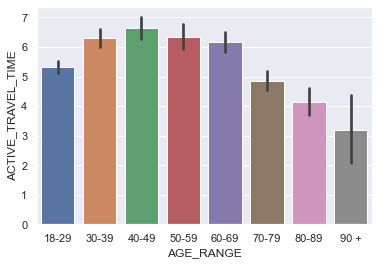

In [19]:
sns.barplot(x = "AGE_RANGE" ,y = "ACTIVE_TRAVEL_TIME", data = df_active)

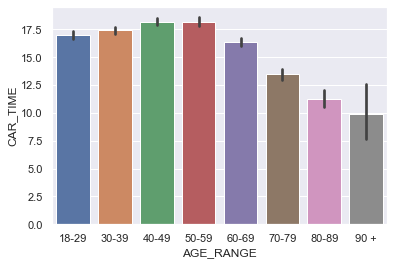

In [20]:
sns.barplot(x = "AGE_RANGE" ,y = "CAR_TIME", data = df_sed)

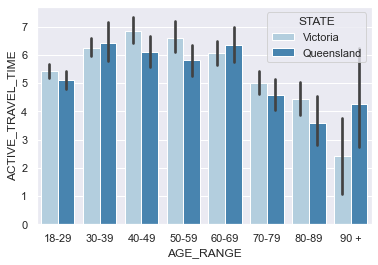

In [21]:
sns.barplot(x = 'AGE_RANGE', y = 'ACTIVE_TRAVEL_TIME', hue = 'STATE', data = df_active,
            palette = 'Blues', edgecolor = 'w')
df_active.groupby(['AGE_RANGE','GENDER']).mean()

plt.show()

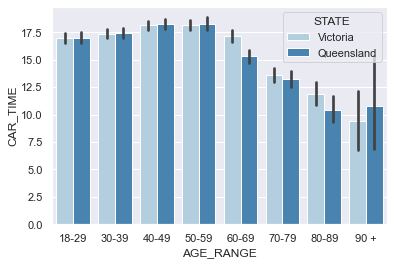

In [22]:
sns.barplot(x = 'AGE_RANGE', y = 'CAR_TIME', hue = 'STATE', data = df_sed,
            palette = 'Blues', edgecolor = 'w')
df_active.groupby(['AGE_RANGE','GENDER']).mean()

plt.show()

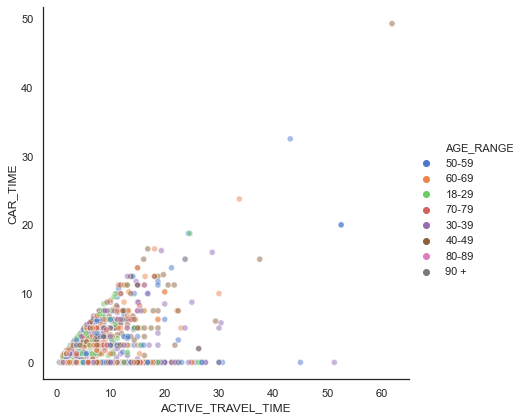

In [23]:
import seaborn as sns
sns.set(style="white")

# Load the example mpg dataset
#mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="ACTIVE_TRAVEL_TIME", y="CAR_TIME", hue="AGE_RANGE",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_active)

In [24]:
from sklearn.cluster import KMeans

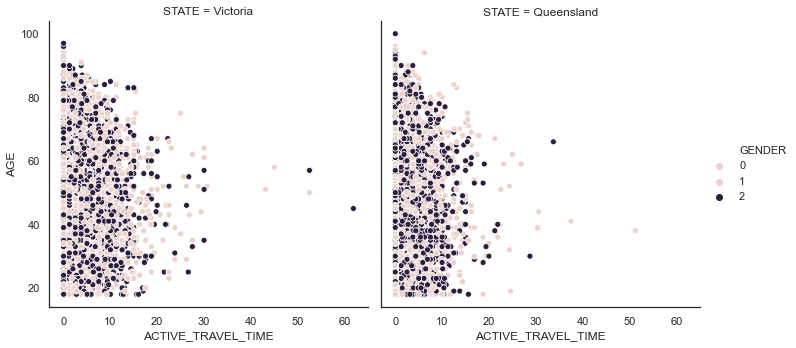

In [27]:
sns.relplot(x="ACTIVE_TRAVEL_TIME", y="AGE", hue="GENDER",col="STATE", data=df1)

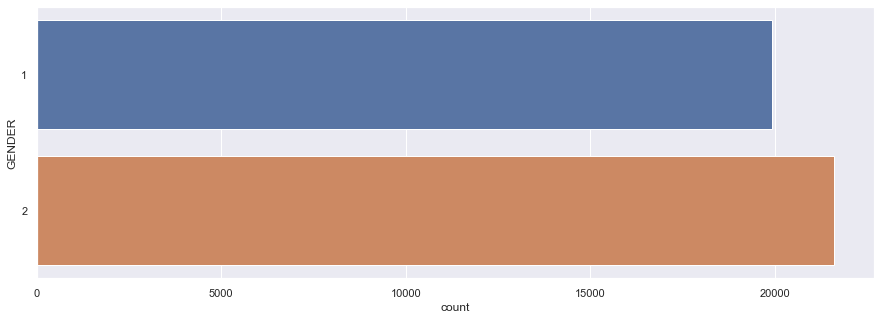

In [44]:
plt.figure(1,figsize = (15,5))
sns.countplot(y= df1['GENDER'])
plt.show()

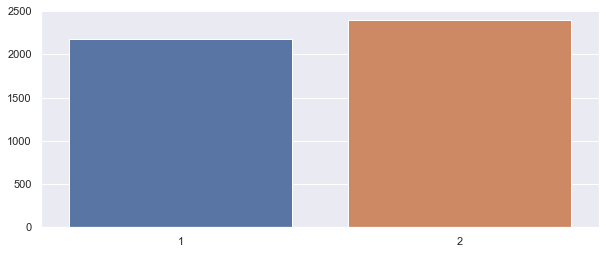

In [29]:
genders = df_active.GENDER.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

### Females are more Active as compared to males

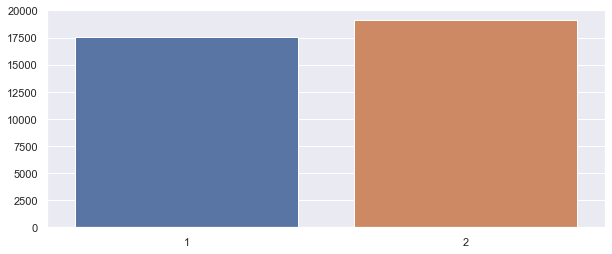

In [31]:
genders = df_sed.GENDER.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [102]:
X = df1[['AGE' , 'ACTIVE_TRAVEL_TIME']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

C:\Users\bhave\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1032: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.



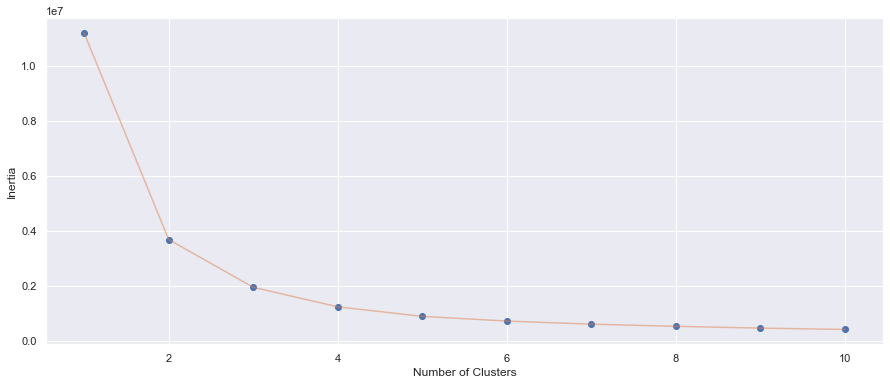

In [103]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [104]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [105]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

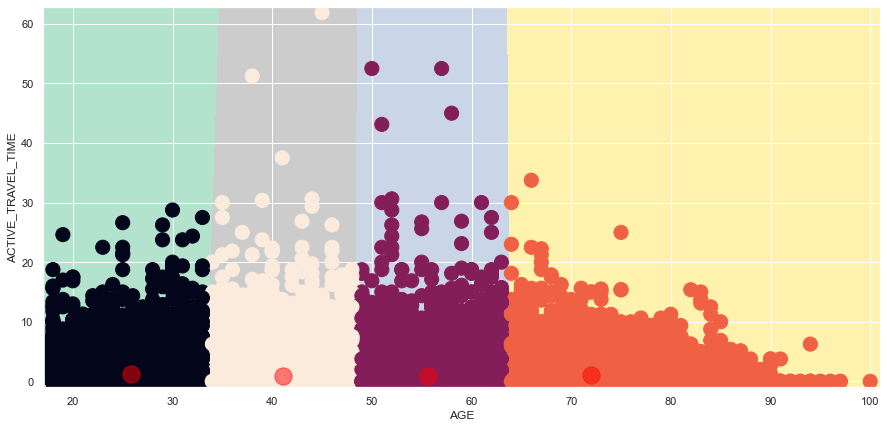

In [106]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'AGE' ,y = 'ACTIVE_TRAVEL_TIME' , data = df1 , c = labels1,s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('ACTIVE_TRAVEL_TIME') , plt.xlabel('AGE')
plt.show()

In [107]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [82]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [88]:
import plotly as py
import plotly.graph_objs as go

In [108]:
df1['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df1['AGE'],
    y= df1['ACTIVE_TRAVEL_TIME'],
    z= df1['CAR_TIME'],
    mode='markers',
     marker=dict(
        color = df1['label3'], 
        size= 20,
        line=dict(
            color= df1['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Active Travel Time'),
            zaxis = dict(title  = 'Car Travel Time')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


In [93]:
df1['RESULT'] = "NA"
df1.loc[df1.ACTIVE_TRAVEL_TIME < df1.CAR_TIME,"RESULT"] = "SEDENTARY" 
df1.loc[df1.ACTIVE_TRAVEL_TIME > df1.CAR_TIME,"RESULT"] = "ACTIVE" 

In [100]:
df2 = df1.query("ACTIVE_TRAVEL_TIME != CAR_TIME")

In [101]:
df2

AGE  GENDER  ANYWORK  CARLICENCE  HHSTRUCTURE  HH_CARS  HHINC_grp  \
0       40       2        1           1            4        0          1   
1       73       1        2           1            2        1          1   
2       85       2        2           1            1        1          1   
3       34       2        1           1            3        1          3   
4       68       1        2           1            3        2          3   
...    ...     ...      ...         ...          ...      ...        ...   
41539   64       2        2           1            5        1          3   
41540   50       2        1           1            3        2          5   
41541   52       1        1           1            3        2          5   
41542   34       2        1           1            3        2          4   
41543   34       1        1           1            3        2          4   

       SA1_code  PopDensity_SA1  SA2_code  PopDensity_SA2  SA3_code  \
0       2100106            1500     21001             158     20101   
1       2100108             703     21001             158     20101   
2       2100108             703     21001             158     20101   
3       2100108             703     21001             158     20101   
4       2100108             703     21001             158     20101   
...         ...             ...       ...             ...       ...   
41539   3144427             947     31444              88     31606   
41540   3144427             947     31444              88     31606   
41541   3144427             947     31444              88     31606   
41542   3144428              57     31444              88     31606   
41543   3144428              57     31444              88     31606   

       PopDensity_SA3       STATE  ACTIVE_TRAVEL_TIME  CAR_TIME AGE_RANGE  \
0                 213    Victoria                 0.0      8.75     40-49   
1                 213    Victoria                 0.0     25.00     70-79   
2                 213    Victoria                 0.0      8.75     80-89   
3                 213    Victoria                 0.0     19.75     30-39   
4                 213    Victoria                 0.0     24.25     60-69   
...               ...         ...                 ...       ...       ...   
41539              30  Queensland                 0.0     19.25     60-69   
41540              30  Queensland                 0.0     10.50     50-59   
41541              30  Queensland                 0.0     15.00     50-59   
41542              30  Queensland                 0.0     17.50     30-39   
41543              30  Queensland                 0.0     15.00     30-39   

       label3     RESULT  
0           3  SEDENTARY  
1           5  SEDENTARY  
2           5  SEDENTARY  
3           3  SEDENTARY  
4           1  SEDENTARY  
...       ...        ...  
41539       1  SEDENTARY  
41540       0  SEDENTARY  
41541       4  SEDENTARY  
41542       3  SEDENTARY  
41543       3  SEDENTARY  

[41237 rows x 19 columns]

In [95]:
df1.RESULT.unique()

array(['SEDENTARY', 'ACTIVE', 'NA'], dtype=object)

In [109]:
X = df1[['RESULT' , 'AGE']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,tol=0.0001,random_state= 111,algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

ValueError: could not convert string to float: 'SEDENTARY'